In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns

In [2]:
df=pd.read_csv('transform_and_clean_data.csv')
df.head()

,Calories,Gender,Age,Duration,Heart_Rate,Body_Temp
0,231.0,1,68,29.0,105.0,40.8
1,66.0,0,20,14.0,94.0,40.3
2,26.0,1,69,5.0,88.0,38.7
3,71.0,0,34,13.0,100.0,40.5
4,35.0,0,27,10.0,81.0,39.8


In [4]:
# from  sklearn.preprocessing import StandardScaler

# std=StandardScaler()

# df.iloc[:,:-1]=std.fit_transform(df.iloc[:,:-1])
# df.head()

In [3]:
x=df[['Age', 'Duration', 'Heart_Rate', 'Body_Temp']].values
y=df['Calories'].values

In [4]:
# Convert to PyTorch tensors (float32 for model input)
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [5]:
x_tensor

tensor([[ 68.0000,  29.0000, 105.0000,  40.8000],
        [ 20.0000,  14.0000,  94.0000,  40.3000],
        [ 69.0000,   5.0000,  88.0000,  38.7000],
        ...,
        [ 43.0000,  16.0000,  90.0000,  40.1000],
        [ 78.0000,   2.0000,  84.0000,  38.3000],
        [ 63.0000,  18.0000,  92.0000,  40.5000]])

In [6]:
from sklearn.model_selection import train_test_split

# 1. Split into train and test
x_train, x_test, y_train, y_test = train_test_split(
    x_tensor, y_tensor, test_size=0.2, random_state=42
)

In [7]:
class ANN(nn.Module):

    def __init__(self,input_dim):
        super(ANN,self).__init__()
        self.model=nn.Sequential(
            nn.Linear(input_dim,64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,1)            
        )

    def forward(self,x):
        return self.model(x)


In [8]:
input_dim=x_train.shape[1]
model=ANN(input_dim)


In [9]:
criterion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [10]:
epochs=300
errors=[]
for epoch in range(epochs):
    model.train()
    outputs=model(x_train)
    loss=criterion(outputs.squeeze(),y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    errors.append([epoch+1,loss])

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [10/300], Loss: 8873.1719
Epoch [20/300], Loss: 6813.1089
Epoch [30/300], Loss: 4898.5024
Epoch [40/300], Loss: 3520.3247
Epoch [50/300], Loss: 3054.0850
Epoch [60/300], Loss: 3055.6467
Epoch [70/300], Loss: 2960.6121
Epoch [80/300], Loss: 2876.9827
Epoch [90/300], Loss: 2812.0134
Epoch [100/300], Loss: 2735.2249
Epoch [110/300], Loss: 2648.3040
Epoch [120/300], Loss: 2550.6814
Epoch [130/300], Loss: 2447.8269
Epoch [140/300], Loss: 2337.3428
Epoch [150/300], Loss: 2216.3677
Epoch [160/300], Loss: 2087.3496
Epoch [170/300], Loss: 1954.5347
Epoch [180/300], Loss: 1818.2437
Epoch [190/300], Loss: 1676.8539
Epoch [200/300], Loss: 1529.7660
Epoch [210/300], Loss: 1377.4327
Epoch [220/300], Loss: 1211.7251
Epoch [230/300], Loss: 1040.6498
Epoch [240/300], Loss: 865.4995
Epoch [250/300], Loss: 696.6677
Epoch [260/300], Loss: 544.7049
Epoch [270/300], Loss: 418.6924
Epoch [280/300], Loss: 322.6388
Epoch [290/300], Loss: 256.3665
Epoch [300/300], Loss: 215.1593


In [11]:
from sklearn.metrics import r2_score

# Put model in evaluation mode
model.eval()

with torch.no_grad():
    # Get predictions
    y_train_pred = model(x_train).squeeze()
    y_test_pred = model(x_test).squeeze()

    # Convert to NumPy arrays for sklearn
    y_train_np = y_train.numpy()
    y_train_pred_np = y_train_pred.numpy()

    y_test_np = y_test.numpy()
    y_test_pred_np = y_test_pred.numpy()

    print(y_train_np)
    print(y_train_pred_np)

    # Calculate R² Scores
    r2_train = r2_score(y_train_np, y_train_pred_np)
    r2_test = r2_score(y_test_np, y_test_pred_np)

    print(f"Train R² Score: {r2_train:.4f}")
    print(f"Test R² Score:  {r2_test:.4f}")


[ 17. 167.  40. ...  41.  57.  59.]
[ 27.234856 153.84854   59.477318 ...  46.90978   66.51937   81.57613 ]
Train R² Score: 0.9451
Test R² Score:  0.9442


In [ ]:
epochs_list, loss_values = zip(*errors)

In [18]:
type(epochs_list)

tuple

In [22]:
loss_values=torch.tensor(loss_values).numpy()

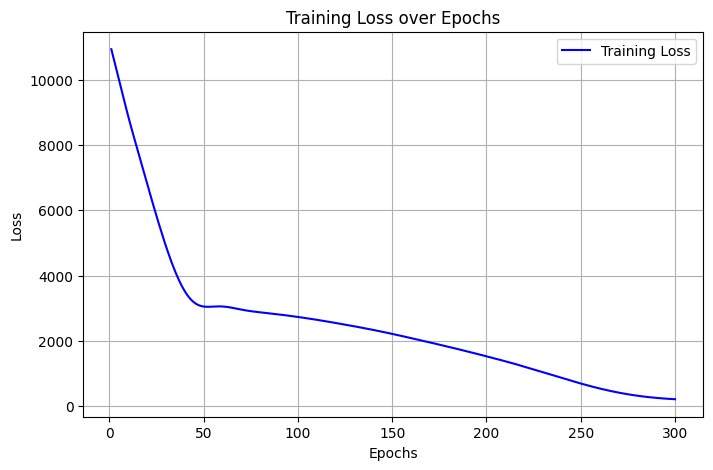

In [23]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(8, 5))
plt.plot(epochs_list, loss_values, label='Training Loss', color='blue')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.grid(True)
plt.legend()
plt.show()

In [24]:
torch.save(model,'pytorch_calorie_burn_prediction_model.pth')

In [26]:
load_model=torch.load('pytorch_calorie_burn_prediction_model.pth',weights_only=False)
load_model.eval()

ANN(
  (model): Sequential(
    (0): Linear(in_features=4, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [27]:
with torch.no_grad():
    predictions = load_model(x_test).squeeze().detach().cpu().numpy()
    print(predictions)

[161.8952   171.74191   64.26514  ... 121.2253    14.196292 175.84567 ]


In [28]:
y_test

tensor([173., 189.,  53.,  ..., 120.,  20., 214.])